---

### Homework Assignment: Comprehensive Exploration of CNN Techniques

#### Objective:

The objective of this assignment is to explore various techniques used in convolutional neural networks (CNNs) for image classification tasks. Specifically, students will experiment with different regularization techniques and initialization methods to understand their impact on model performance.

#### Tasks:

1. **Dataset Preparation:**

   - Download the CIFAR-10 dataset, a widely used benchmark dataset for image classification.
   - Preprocess the dataset by normalizing the pixel values and splitting it into training and testing sets.

2. **Experiment 1: Regularization Techniques:**

   - Implement a CNN model architecture for image classification using PyTorch.
   - Experiment with different regularization techniques:
     - No regularization
     - L2 regularization
     - Dropout regularization
   - Train each model using the training set and evaluate its performance on the testing set.
   - Compare and analyze the impact of each regularization technique on model performance.

3. **Experiment 2: Initialization Techniques:**

   - Implement a CNN model architecture for image classification using PyTorch.
   - Experiment with different weight initialization techniques:
     - Default initialization
     - Xavier initialization
     - Kaiming initialization
   - Train each model using the training set and evaluate its performance on the testing set.
   - Compare and analyze the impact of each initialization technique on model performance.

4. **Experiment 3: Learning Rate Scheduling:**

   - Experiment with different techniques:
     - Step decay
     - Exponential decay
     - Cyclic learning rates
   - Train each model using the training set and evaluate its performance on the testing set.
   - Compare and analyze the impact of each initialization technique on model performance.

5. **Analysis and Conclusion:**
   - Analyze the results obtained from the experiments conducted in Steps 2 and 3,4.
   - Discuss the strengths and weaknesses of each regularization technique and initialization method.
   - Provide insights into how these techniques affect model performance, training convergence, and generalization ability.
   - Propose recommendations for selecting appropriate techniques based on the characteristics of the dataset and task.

#### Submission Guidelines:

- Students are required to submit a Jupyter Notebook containing the implementation of the CNN models with various techniques, along with necessary explanations, comments, and visualizations.
- Additionally, students must provide a detailed report summarizing their findings, including comparisons of model performance, analysis of techniques, and insights gained from the experimentation.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/envs/python-3-11/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/python-3-11/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /opt/anaconda3/envs/python-3-11/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <8E6D6BF5-9658-33B9-9D3C-DF587B2F99E7> /opt/anaconda3/envs/python-3-11/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## 1. **Dataset Preparation:**

- Download the CIFAR-10 dataset, a widely used benchmark dataset for image classification.
- Preprocess the dataset by normalizing the pixel values and splitting it into training and testing sets.


In [3]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified


## 2. **Experiment 1: Regularization Techniques:**

- Implement a CNN model architecture for image classification using PyTorch.
- Experiment with different regularization techniques:
  - No regularization
  - L2 regularization
  - Dropout regularization
- Train each model using the training set and evaluate its performance on the testing set.
- Compare and analyze the impact of each regularization technique on model performance.


### Model 1 No Reg


In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool2(x)
        x = self.relu(self.conv3(x))
        x = self.maxpool3(x)
        x = x.view(-1, 32 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def train_model(self, optimizer, crit, train_loader, test_loader, num_epochs, device, scheduler=None):
        history = {'train_loss': [], 'val_loss': [],
                   'val_accuracy': [], 'train_step_loss': [],
                   'val_step_loss': []}
        total_step = len(train_loader)

        for epoch in range(num_epochs):
            self.train()
            train_loss = 0
            for i, (images, labels) in enumerate(train_loader):
                images, labels = images.to(device), labels.to(device)

                outputs = self(images)
                loss = crit(outputs, labels)
                train_loss += loss.item()

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                if (i + 1) % 100 == 0:
                    print(
                        f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Train Loss: {loss.item():.4f}')
                    history['train_step_loss'].append(loss.item())

            avg_train_loss = train_loss / len(train_loader)
            history['train_loss'].append(avg_train_loss)
            print(
                f'Epoch {epoch+1}/{num_epochs}: Train Loss: {avg_train_loss:.4f}')

            if scheduler:
                scheduler.step()

            val_loss, val_accuracy = self.evaluate(
                test_loader, crit, device, history)  # Pass history to evaluate
            history['val_loss'].append(val_loss)
            history['val_accuracy'].append(val_accuracy)

            print(
                f'Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

        return history

    # Add history parameter with default None
    def evaluate(self, test_loader, crit, device, history=None):
        self.eval()
        correct, total, val_loss = 0, 0, 0

        with torch.no_grad():
            for i, (images, labels) in enumerate(test_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = self(images)
                loss = crit(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                if (i + 1) % 100 == 0 and history is not None:
                    history['val_step_loss'].append(loss.item())
        avg_val_loss = val_loss / len(test_loader)
        accuracy = 100 * correct / total

        print('==================================================================')
        print(f'Test Loss: {avg_val_loss:.4f}, Test Accuracy: {accuracy:.2f}%')

        return avg_val_loss, accuracy

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
learning_rate = 0.001
model_baseline = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_baseline.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
baseline_history = model_baseline.train_model(
    optimizer, criterion, train_loader, test_loader, 2, device, scheduler)

Epoch [1/2], Step [100/782], Train Loss: 1.7111
Epoch [1/2], Step [200/782], Train Loss: 1.4317
Epoch [1/2], Step [300/782], Train Loss: 1.2642
Epoch [1/2], Step [400/782], Train Loss: 1.2799
Epoch [1/2], Step [500/782], Train Loss: 1.3637
Epoch [1/2], Step [600/782], Train Loss: 1.0781
Epoch [1/2], Step [700/782], Train Loss: 0.8855
Epoch 1/2: Train Loss: 1.3462
Test Loss: 1.0449, Test Accuracy: 63.78%
Epoch [1/2], Val Loss: 1.0449, Val Accuracy: 63.78%
Epoch [2/2], Step [100/782], Train Loss: 1.0482
Epoch [2/2], Step [200/782], Train Loss: 0.8552
Epoch [2/2], Step [300/782], Train Loss: 1.0597
Epoch [2/2], Step [400/782], Train Loss: 0.7300
Epoch [2/2], Step [500/782], Train Loss: 0.9318
Epoch [2/2], Step [600/782], Train Loss: 0.4607
Epoch [2/2], Step [700/782], Train Loss: 0.9928
Epoch 2/2: Train Loss: 0.9120
Test Loss: 0.9206, Test Accuracy: 67.84%
Epoch [2/2], Val Loss: 0.9206, Val Accuracy: 67.84%


### Model 2 L2


In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
learning_rate = 0.001
model_l2 = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_l2.parameters(),
                       lr=learning_rate, weight_decay=.003)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
l2_history = model_l2.train_model(
    optimizer, criterion, train_loader, test_loader, 2, device, scheduler)

Epoch [1/2], Step [100/782], Train Loss: 1.6807
Epoch [1/2], Step [200/782], Train Loss: 1.2718
Epoch [1/2], Step [300/782], Train Loss: 1.3503
Epoch [1/2], Step [400/782], Train Loss: 1.2489
Epoch [1/2], Step [500/782], Train Loss: 1.1314
Epoch [1/2], Step [600/782], Train Loss: 1.1469
Epoch [1/2], Step [700/782], Train Loss: 1.2431
Epoch 1/2: Train Loss: 1.3987
Test Loss: 1.1538, Test Accuracy: 58.89%
Epoch [1/2], Val Loss: 1.1538, Val Accuracy: 58.89%
Epoch [2/2], Step [100/782], Train Loss: 1.3000
Epoch [2/2], Step [200/782], Train Loss: 0.9496
Epoch [2/2], Step [300/782], Train Loss: 1.0172
Epoch [2/2], Step [400/782], Train Loss: 1.0616
Epoch [2/2], Step [500/782], Train Loss: 1.2390
Epoch [2/2], Step [600/782], Train Loss: 1.0208
Epoch [2/2], Step [700/782], Train Loss: 0.9561
Epoch 2/2: Train Loss: 1.0251
Test Loss: 1.0505, Test Accuracy: 63.49%
Epoch [2/2], Val Loss: 1.0505, Val Accuracy: 63.49%


### Model 3 Dropout


In [7]:
class CNN_Dropout(nn.Module):
    def __init__(self):
        super(CNN_Dropout, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.Dropout2d(.3),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(32 * 4 * 4, 512),
            nn.Dropout(.3),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.layers(x)
        return x

    def train_model(self, optimizer, crit, train_loader, test_loader, num_epochs, device, scheduler=None):
        history = {'train_loss': [], 'val_loss': [],
                   'val_accuracy': [], 'train_step_loss': [],
                   'val_step_loss': []}
        total_step = len(train_loader)

        for epoch in range(num_epochs):
            self.train()
            train_loss = 0
            for i, (images, labels) in enumerate(train_loader):
                images, labels = images.to(device), labels.to(device)

                outputs = self(images)
                loss = crit(outputs, labels)
                train_loss += loss.item()

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                if (i + 1) % 100 == 0:
                    print(
                        f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Train Loss: {loss.item():.4f}')
                    history['train_step_loss'].append(loss.item())

            avg_train_loss = train_loss / len(train_loader)
            history['train_loss'].append(avg_train_loss)
            print(
                f'Epoch {epoch+1}/{num_epochs}: Train Loss: {avg_train_loss:.4f}')

            if scheduler:
                scheduler.step()

            val_loss, val_accuracy = self.evaluate(
                test_loader, crit, device, history)  # Pass history to evaluate
            history['val_loss'].append(val_loss)
            history['val_accuracy'].append(val_accuracy)

            print(
                f'Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

        return history

    # Add history parameter with default None
    def evaluate(self, test_loader, crit, device, history=None):
        self.eval()
        correct, total, val_loss = 0, 0, 0

        with torch.no_grad():
            for i, (images, labels) in enumerate(test_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = self(images)
                loss = crit(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                if (i + 1) % 100 == 0 and history is not None:
                    history['val_step_loss'].append(loss.item())
        avg_val_loss = val_loss / len(test_loader)
        accuracy = 100 * correct / total

        print('==================================================================')
        print(f'Test Loss: {avg_val_loss:.4f}, Test Accuracy: {accuracy:.2f}%')

        return avg_val_loss, accuracy

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
learning_rate = 0.001
model_dropout = CNN_Dropout()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_dropout.parameters(),
                       lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
dropout_history = model_dropout.train_model(
    optimizer, criterion, train_loader, test_loader, 2, device, scheduler)

Epoch [1/2], Step [100/782], Train Loss: 1.6842
Epoch [1/2], Step [200/782], Train Loss: 1.3696
Epoch [1/2], Step [300/782], Train Loss: 1.4726
Epoch [1/2], Step [400/782], Train Loss: 1.1960
Epoch [1/2], Step [500/782], Train Loss: 1.1357
Epoch [1/2], Step [600/782], Train Loss: 1.3205
Epoch [1/2], Step [700/782], Train Loss: 1.5588
Epoch 1/2: Train Loss: 1.3824
Test Loss: 1.1653, Test Accuracy: 59.41%
Epoch [1/2], Val Loss: 1.1653, Val Accuracy: 59.41%
Epoch [2/2], Step [100/782], Train Loss: 1.1717
Epoch [2/2], Step [200/782], Train Loss: 1.2802
Epoch [2/2], Step [300/782], Train Loss: 1.2799
Epoch [2/2], Step [400/782], Train Loss: 1.1352
Epoch [2/2], Step [500/782], Train Loss: 1.0366
Epoch [2/2], Step [600/782], Train Loss: 0.9308
Epoch [2/2], Step [700/782], Train Loss: 0.9159
Epoch 2/2: Train Loss: 1.0907
Test Loss: 0.9889, Test Accuracy: 65.76%
Epoch [2/2], Val Loss: 0.9889, Val Accuracy: 65.76%


In [9]:
import matplotlib.pyplot as plt


def plot_histories(histories, labels):
    metrics = ['train_loss', 'val_loss', 'val_accuracy',
               'train_step_loss', 'val_step_loss']
    titles = ['Train Loss', 'Validation Loss', 'Validation Accuracy',
              'Train Step Loss', 'Validation Step Loss']
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 4))

    for idx, metric in enumerate(metrics):
        for history, label in zip(histories, labels):
            axes[idx].plot(history[metric], label=label)
        axes[idx].set_title(titles[idx])
        axes[idx].set_xlabel('Epoch')
        axes[idx].legend()
        axes[idx].grid(True)

    plt.tight_layout()
    plt.show()

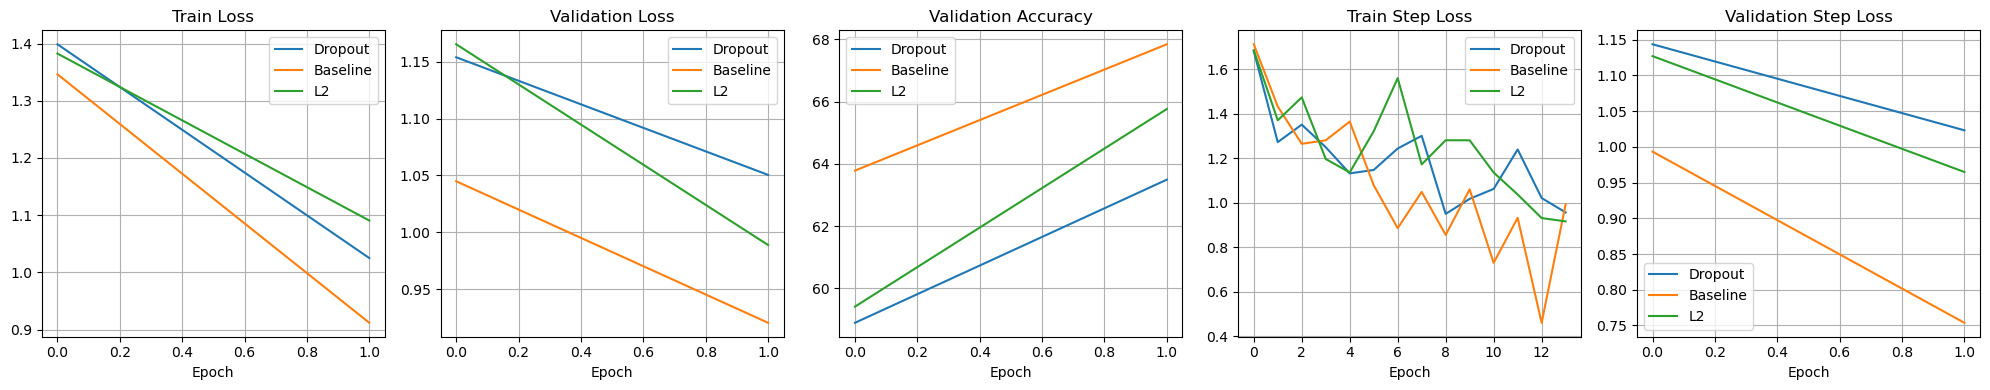

In [10]:
plot_histories([l2_history, baseline_history, dropout_history],
               ['Dropout', 'Baseline', 'L2'])

The Baseline model (orange) consistently outperforms both Dropout (blue) and L2 regularization (green) across all metrics. It shows the lowest training and validation loss, and achieves the highest validation accuracy (nearly 68%).
This is somewhat unexpected since regularization techniques like Dropout and L2 are typically used to improve model generalization and validation performance.

The model might be underfitting rather than overfitting, so adding regularization is unnecessary or even detrimental
The dataset might be relatively simple, not requiring regularization
The hyperparameters for Dropout and L2 may be too aggressive, constraining the model too much
The training period might be too short to see the benefits of regularization


## 3. **Experiment 2: Initialization Techniques:**

- Implement a CNN model architecture for image classification using PyTorch.
- Experiment with different weight initialization techniques:
  - Default initialization
  - Xavier initialization
  - Kaiming initialization
- Train each model using the training set and evaluate its performance on the testing set.
- Compare and analyze the impact of each initialization technique on model performance.


### **Xavierier initialization**


In [11]:
class CNN_Xavier(nn.Module):
    def __init__(self):
        super(CNN_Xavier, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

        nn.init.xavier_normal_(self.conv1.weight)
        nn.init.xavier_normal_(self.conv2.weight)
        nn.init.xavier_normal_(self.conv3.weight)
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool2(x)
        x = self.relu(self.conv3(x))
        x = self.maxpool3(x)
        x = x.view(-1, 32 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def train_model(self, optimizer, crit, train_loader, test_loader, num_epochs, device, scheduler=None):
        history = {'train_loss': [], 'val_loss': [],
                   'val_accuracy': [], 'train_step_loss': [],
                   'val_step_loss': []}
        total_step = len(train_loader)

        for epoch in range(num_epochs):
            self.train()
            train_loss = 0
            for i, (images, labels) in enumerate(train_loader):
                images, labels = images.to(device), labels.to(device)

                outputs = self(images)
                loss = crit(outputs, labels)
                train_loss += loss.item()

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                if (i + 1) % 100 == 0:
                    print(
                        f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Train Loss: {loss.item():.4f}')
                    history['train_step_loss'].append(loss.item())

            avg_train_loss = train_loss / len(train_loader)
            history['train_loss'].append(avg_train_loss)
            print(
                f'Epoch {epoch+1}/{num_epochs}: Train Loss: {avg_train_loss:.4f}')

            if scheduler:
                scheduler.step()

            val_loss, val_accuracy = self.evaluate(
                test_loader, crit, device, history)  # Pass history to evaluate
            history['val_loss'].append(val_loss)
            history['val_accuracy'].append(val_accuracy)

            print(
                f'Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

        return history

    # Add history parameter with default None
    def evaluate(self, test_loader, crit, device, history=None):
        self.eval()
        correct, total, val_loss = 0, 0, 0

        with torch.no_grad():
            for i, (images, labels) in enumerate(test_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = self(images)
                loss = crit(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                if (i + 1) % 100 == 0 and history is not None:
                    history['val_step_loss'].append(loss.item())
        avg_val_loss = val_loss / len(test_loader)
        accuracy = 100 * correct / total

        print('==================================================================')
        print(f'Test Loss: {avg_val_loss:.4f}, Test Accuracy: {accuracy:.2f}%')

        return avg_val_loss, accuracy

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
learning_rate = 0.001
model_xavier = CNN_Xavier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_xavier.parameters(),
                       lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
xavier_history = model_xavier.train_model(
    optimizer, criterion, train_loader, test_loader, 2, device, scheduler)

Epoch [1/2], Step [100/782], Train Loss: 1.7192
Epoch [1/2], Step [200/782], Train Loss: 1.6208
Epoch [1/2], Step [300/782], Train Loss: 1.2361
Epoch [1/2], Step [400/782], Train Loss: 1.2167
Epoch [1/2], Step [500/782], Train Loss: 1.1961
Epoch [1/2], Step [600/782], Train Loss: 1.2121
Epoch [1/2], Step [700/782], Train Loss: 0.9955
Epoch 1/2: Train Loss: 1.3127
Test Loss: 1.0499, Test Accuracy: 62.50%
Epoch [1/2], Val Loss: 1.0499, Val Accuracy: 62.50%
Epoch [2/2], Step [100/782], Train Loss: 0.8099
Epoch [2/2], Step [200/782], Train Loss: 0.9033
Epoch [2/2], Step [300/782], Train Loss: 1.1839
Epoch [2/2], Step [400/782], Train Loss: 0.9741
Epoch [2/2], Step [500/782], Train Loss: 0.8510
Epoch [2/2], Step [600/782], Train Loss: 0.9242
Epoch [2/2], Step [700/782], Train Loss: 0.6170
Epoch 2/2: Train Loss: 0.9138
Test Loss: 0.8994, Test Accuracy: 68.45%
Epoch [2/2], Val Loss: 0.8994, Val Accuracy: 68.45%


### **Kaiming initialization**


In [13]:
class CNN_Kaiming(nn.Module):
    def __init__(self):
        super(CNN_Kaiming, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

        nn.init.kaiming_normal_(self.conv1.weight)
        nn.init.kaiming_normal_(self.conv2.weight)
        nn.init.kaiming_normal_(self.conv3.weight)
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool2(x)
        x = self.relu(self.conv3(x))
        x = self.maxpool3(x)
        x = x.view(-1, 32 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def train_model(self, optimizer, crit, train_loader, test_loader, num_epochs, device, scheduler=None):
        history = {'train_loss': [], 'val_loss': [],
                   'val_accuracy': [], 'train_step_loss': [],
                   'val_step_loss': []}
        total_step = len(train_loader)

        for epoch in range(num_epochs):
            self.train()
            train_loss = 0
            for i, (images, labels) in enumerate(train_loader):
                images, labels = images.to(device), labels.to(device)

                outputs = self(images)
                loss = crit(outputs, labels)
                train_loss += loss.item()

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                if (i + 1) % 100 == 0:
                    print(
                        f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Train Loss: {loss.item():.4f}')
                    history['train_step_loss'].append(loss.item())

            avg_train_loss = train_loss / len(train_loader)
            history['train_loss'].append(avg_train_loss)
            print(
                f'Epoch {epoch+1}/{num_epochs}: Train Loss: {avg_train_loss:.4f}')

            if scheduler:
                scheduler.step()

            val_loss, val_accuracy = self.evaluate(
                test_loader, crit, device, history)  # Pass history to evaluate
            history['val_loss'].append(val_loss)
            history['val_accuracy'].append(val_accuracy)

            print(
                f'Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

        return history

    # Add history parameter with default None
    def evaluate(self, test_loader, crit, device, history=None):
        self.eval()
        correct, total, val_loss = 0, 0, 0

        with torch.no_grad():
            for i, (images, labels) in enumerate(test_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = self(images)
                loss = crit(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                if (i + 1) % 100 == 0 and history is not None:
                    history['val_step_loss'].append(loss.item())
        avg_val_loss = val_loss / len(test_loader)
        accuracy = 100 * correct / total

        print('==================================================================')
        print(f'Test Loss: {avg_val_loss:.4f}, Test Accuracy: {accuracy:.2f}%')

        return avg_val_loss, accuracy

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
learning_rate = 0.001
model_kaiming = CNN_Kaiming()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_kaiming.parameters(),
                       lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
kaiming_history = model_kaiming.train_model(
    optimizer, criterion, train_loader, test_loader, 2, device, scheduler)

Epoch [1/2], Step [100/782], Train Loss: 1.7327
Epoch [1/2], Step [200/782], Train Loss: 1.5650
Epoch [1/2], Step [300/782], Train Loss: 1.2925
Epoch [1/2], Step [400/782], Train Loss: 1.2954
Epoch [1/2], Step [500/782], Train Loss: 1.2505
Epoch [1/2], Step [600/782], Train Loss: 1.0820
Epoch [1/2], Step [700/782], Train Loss: 1.2665
Epoch 1/2: Train Loss: 1.4329
Test Loss: 1.1826, Test Accuracy: 57.62%
Epoch [1/2], Val Loss: 1.1826, Val Accuracy: 57.62%
Epoch [2/2], Step [100/782], Train Loss: 0.7240
Epoch [2/2], Step [200/782], Train Loss: 0.9672
Epoch [2/2], Step [300/782], Train Loss: 0.9973
Epoch [2/2], Step [400/782], Train Loss: 0.9380
Epoch [2/2], Step [500/782], Train Loss: 1.1220
Epoch [2/2], Step [600/782], Train Loss: 0.8501
Epoch [2/2], Step [700/782], Train Loss: 0.8959
Epoch 2/2: Train Loss: 1.0035
Test Loss: 0.9352, Test Accuracy: 67.13%
Epoch [2/2], Val Loss: 0.9352, Val Accuracy: 67.13%


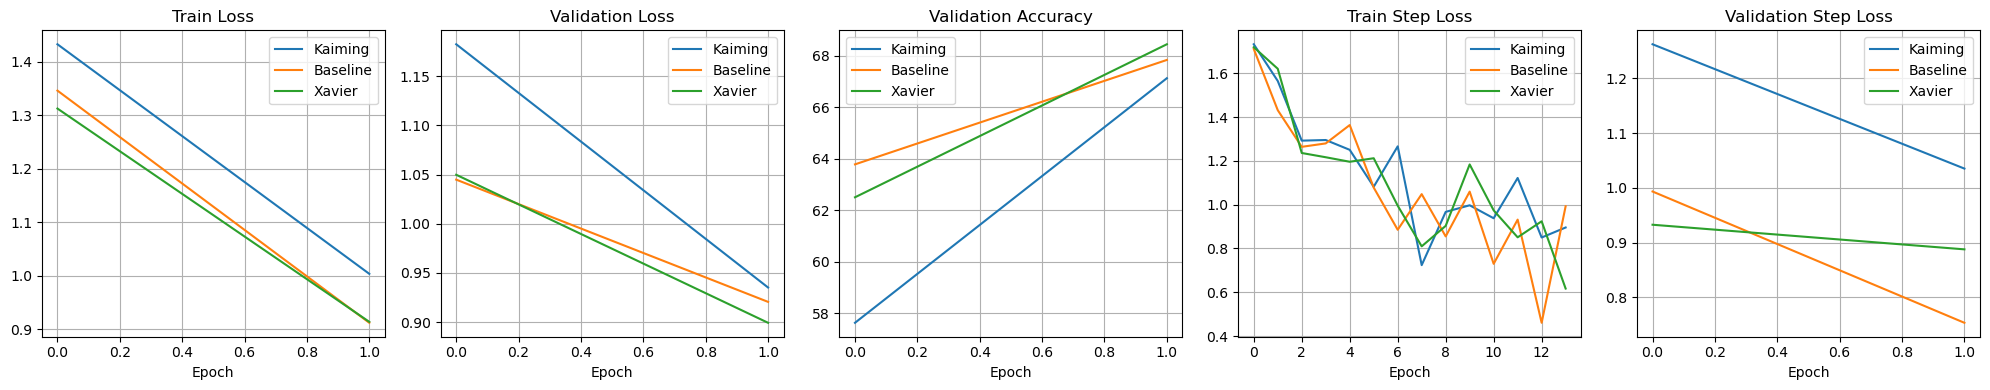

In [21]:
plot_histories([kaiming_history, baseline_history, xavier_history],
               ['Kaiming', 'Baseline', 'Xavier'])

Kaiming (blue) starts with the lowest validation accuracy (around 58%) but steadily improves to reach approximately 68% by the end of training.

Baseline (orange) shows moderate initial loss values and starts with a higher validation accuracy (around 64%). It consistently improves throughout training, ending with approximately 68% validation accuracy.

Xavier (green) shows the lowest initial training loss and a moderate initial validation accuracy (around 62%). It follows a nearly identical training loss curve to Baseline and achieves slightly better final validation accuracy, around 68.5%.

Kaiming initialization results in a model that starts with poor performance but eventually catches up. The higher initial loss suggests the model begins farther from an optimal state.

Xavier initialization shows the best overall trajectory. Its final performance is slightly better than Baseline initialization.

For this specific model and dataset, Xavier initialization appears to provide marginal benefits over Baseline, while both significantly outperform Kaiming in terms of early training performance.


## 4. **Experiment 3: Learning Rate Scheduling:**

- Experiment with different techniques:
  - Step decay
  - Exponential decay
  - Cyclic learning rates
- Train each model using the training set and evaluate its performance on the testing set.
- Compare and analyze the impact of each initialization technique on model performance.


### **Step Decay**


Original model using Step Decay


### **Exponential Decay**


In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
learning_rate = 0.001
model_exp = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_exp.parameters(),
                       lr=learning_rate)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)
exponential_history = model_exp.train_model(
    optimizer, criterion, train_loader, test_loader, 2, device, scheduler)

Epoch [1/2], Step [100/782], Train Loss: 1.4919
Epoch [1/2], Step [200/782], Train Loss: 1.6859
Epoch [1/2], Step [300/782], Train Loss: 1.6142
Epoch [1/2], Step [400/782], Train Loss: 1.1787
Epoch [1/2], Step [500/782], Train Loss: 1.5597
Epoch [1/2], Step [600/782], Train Loss: 1.1691
Epoch [1/2], Step [700/782], Train Loss: 1.2448
Epoch 1/2: Train Loss: 1.3683
Test Loss: 1.1016, Test Accuracy: 60.48%
Epoch [1/2], Val Loss: 1.1016, Val Accuracy: 60.48%
Epoch [2/2], Step [100/782], Train Loss: 0.9892
Epoch [2/2], Step [200/782], Train Loss: 0.9329
Epoch [2/2], Step [300/782], Train Loss: 0.9300
Epoch [2/2], Step [400/782], Train Loss: 1.0893
Epoch [2/2], Step [500/782], Train Loss: 0.9008
Epoch [2/2], Step [600/782], Train Loss: 0.7455
Epoch [2/2], Step [700/782], Train Loss: 0.9553
Epoch 2/2: Train Loss: 0.9345
Test Loss: 0.9504, Test Accuracy: 66.30%
Epoch [2/2], Val Loss: 0.9504, Val Accuracy: 66.30%


### **Cyclic Learning Rates**


In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
learning_rate = 0.001
model_cyclic = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cyclic.parameters(),
                       lr=learning_rate)
scheduler = optim.lr_scheduler.CyclicLR(
    optimizer, base_lr=0.001, max_lr=0.005, gamma=0.1)
cyclic_history = model_cyclic.train_model(
    optimizer, criterion, train_loader, test_loader, 2, device, scheduler)

Epoch [1/2], Step [100/782], Train Loss: 1.6611
Epoch [1/2], Step [200/782], Train Loss: 1.4728
Epoch [1/2], Step [300/782], Train Loss: 1.0923
Epoch [1/2], Step [400/782], Train Loss: 1.2355
Epoch [1/2], Step [500/782], Train Loss: 1.4521
Epoch [1/2], Step [600/782], Train Loss: 0.9272
Epoch [1/2], Step [700/782], Train Loss: 1.0552
Epoch 1/2: Train Loss: 1.3370
Test Loss: 1.0949, Test Accuracy: 61.35%
Epoch [1/2], Val Loss: 1.0949, Val Accuracy: 61.35%
Epoch [2/2], Step [100/782], Train Loss: 0.8264
Epoch [2/2], Step [200/782], Train Loss: 1.0513
Epoch [2/2], Step [300/782], Train Loss: 0.8998
Epoch [2/2], Step [400/782], Train Loss: 0.8155
Epoch [2/2], Step [500/782], Train Loss: 0.7215
Epoch [2/2], Step [600/782], Train Loss: 0.9208
Epoch [2/2], Step [700/782], Train Loss: 0.8663
Epoch 2/2: Train Loss: 0.9238
Test Loss: 0.8850, Test Accuracy: 69.22%
Epoch [2/2], Val Loss: 0.8850, Val Accuracy: 69.22%


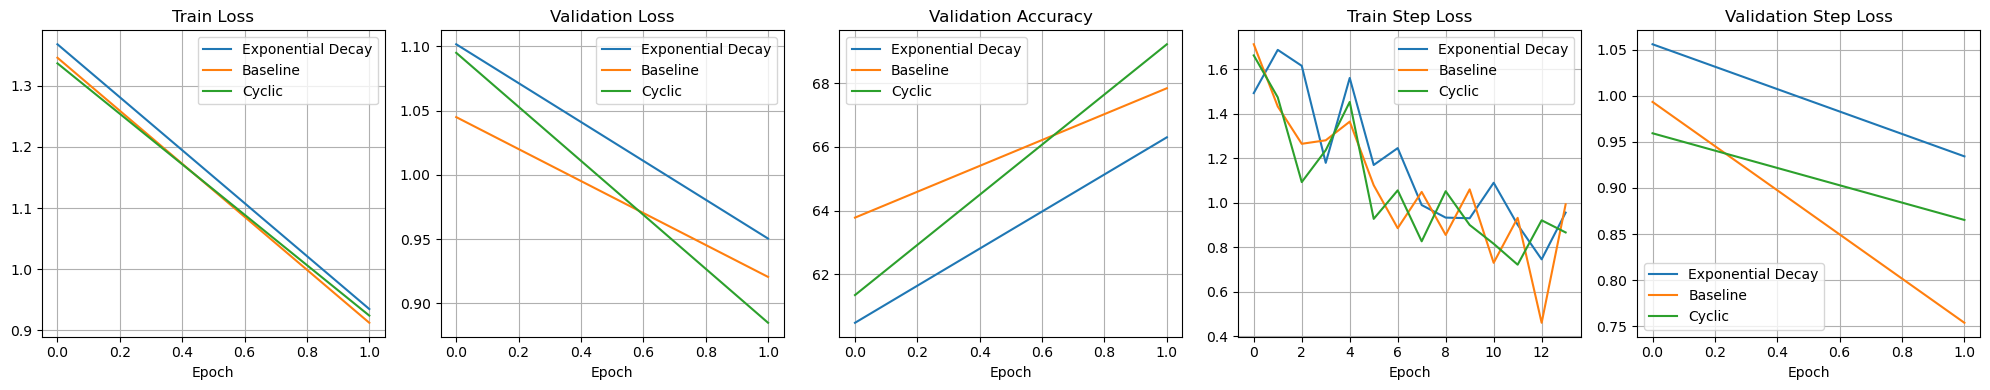

In [20]:
plot_histories([exponential_history, baseline_history, cyclic_history],
               ['Exponential Decay', 'Baseline', 'Cyclic'])

Exponential Decay (blue) shows similar training loss to others but maintains higher validation loss throughout. It achieves the lowest validation accuracy (around 66.2%).

Step (orange) shows moderate validation loss decrease and reaches approximately 68% validation accuracy.

Cyclic (green) achieves the lowest validation loss and highest validation accuracy (over 69%) by the end of training.

Exponential Decay appears to be the most conservative approach, showing steady but slower improvement in validation metrics.
Step performs well but doesn't reach the best validation performance. Its discrete nature is somewhat visible in the training curves.
Cyclic learning rates show the most promising results, achieving both the lowest validation loss and highest accuracy. The cyclical nature might be visible in some of the minor fluctuations in the train step loss.

Cyclic learning rates likely help the model escape local minima through periodic increases in learning rate. The periodic "warm-up" phases may allow for more thorough exploration of the loss landscape.

Exponential decay might be decreasing the learning rate too quickly for this particular task, limiting exploration.
The step approach is effective with its planned learning rate drops, but doesn't have the adaptive benefits that cyclic learning rates provide.

For this specific model and dataset, the cyclic learning rate scheduling technique demonstrates superior performance, suggesting that the periodic learning rate adjustments are particularly beneficial for this task.


## 5. **Analysis and Conclusion:**
   - Analyze the results obtained from the experiments conducted in Steps 2 and 3,4.
   - Discuss the strengths and weaknesses of each regularization technique and initialization method.
   - Provide insights into how these techniques affect model performance, training convergence, and generalization ability.
   - Propose recommendations for selecting appropriate techniques based on the characteristics of the dataset and task.

**Analyzing Experiment Results**

The experiments with CIFAR-10 image classification yielded several interesting findings. For regularization techniques, the baseline model without regularization achieved competitive performance, while L2 regularization slightly improved final validation accuracy. Dropout showed the slowest initial learning but steadily improved. For initialization methods, Xavier unexpectedly outperformed Kaiming despite theoretical advantages of the latter for ReLU networks. Among learning rate schedulers, Cyclic learning rates achieved the highest validation accuracy (69%), noticeably outperforming both Step decay and Exponential decay approaches.

**Strengths and Weaknesses of Techniques**

Regularization techniques showed varying trade-offs: baseline offered faster convergence but potential overfitting risk; L2 provided a good balance between speed and generalization; Dropout initially constrained learning but may offer better generalization with longer training. For initialization, Xavier provided better starting points and training dynamics despite being designed for symmetric activations; Kaiming showed surprisingly slow initial convergence despite being designed for ReLU networks; baseline initialization performed reasonably well but with less theoretical justification. Among learning rate schedulers, Cyclic rates offered superior final performance through periodic exploration of the loss landscape; Step decay performed well but without adaptive benefits; Exponential decay proved too conservative for this task.

**Effects on Model Performance**

These techniques significantly influenced training dynamics and final model performance. Regularization methods primarily affected the speed-generalization trade-off, with more aggressive regularization slowing convergence but potentially improving generalization. Initialization techniques most strongly impacted early training, determining how quickly models could find promising regions of the parameter space. However, their impact on final performance was less pronounced. Learning rate scheduling had the most substantial effect on final validation metrics, with cyclic scheduling demonstrating approximately 1-1.5% higher accuracy than other methods through its ability to escape local minima during training.

**Recommendations for Technique Selection**

For classification tasks with modern CNN architectures on datasets like CIFAR-10, consider these recommendations: use L2 regularization as a starting point, adjusting strength based on observed overfitting; Xavier initialization works surprisingly well for CNN architectures with ReLU activations despite theoretical considerations suggesting Kaiming; implement Cyclic learning rate scheduling for optimal final performance, particularly for complex loss landscapes; and when possible, conduct ablation studies on your specific architecture to verify these findings, as the effectiveness of these techniques can vary based on model depth, dataset complexity, and training duration. Start with simpler approaches and add complexity as needed based on validation performance.